In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/public_timeseries_testing_util.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv
/kaggle/input/amp-parkinsons-disease-progression-pre

In [3]:
proteins_train = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv')
peptides_train = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv')
clinical_train = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv')
supplemental_data = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv')

In [4]:
print(proteins_train.isnull().sum()) #checking for nulls
print(peptides_train.isnull().sum()) #checking for nulls
print(clinical_train.isnull().sum()) #checking for nulls
print(supplemental_data.isnull().sum()) #checking for nulls

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64
visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64
visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64
visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                 213
updrs_2                                 214
updrs_3                                   5
updrs_4                                 928
upd23b_clinical_state_on_medication    1101
dtype: int64


In [5]:
# Merging the proteins and peptides data
proteins_peptides = pd.merge(proteins_train, peptides_train, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])
merged_data = pd.merge(proteins_peptides, clinical_train, on = ['visit_id', 'visit_month', 'patient_id'])


In [6]:
merged_data

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,NaN,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,NaN,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN


In [7]:
merged_data.duplicated().sum() #checking for duplicates

0

In [8]:
merged_data.upd23b_clinical_state_on_medication.unique()

array([nan, 'On', 'Off'], dtype=object)

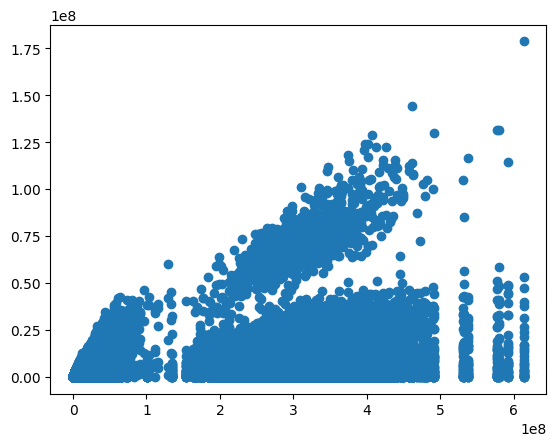

In [9]:
#Visualize the relationship between NPX and peptide abundance

plt.scatter(merged_data['NPX'], merged_data['PeptideAbundance'])
plt.show()

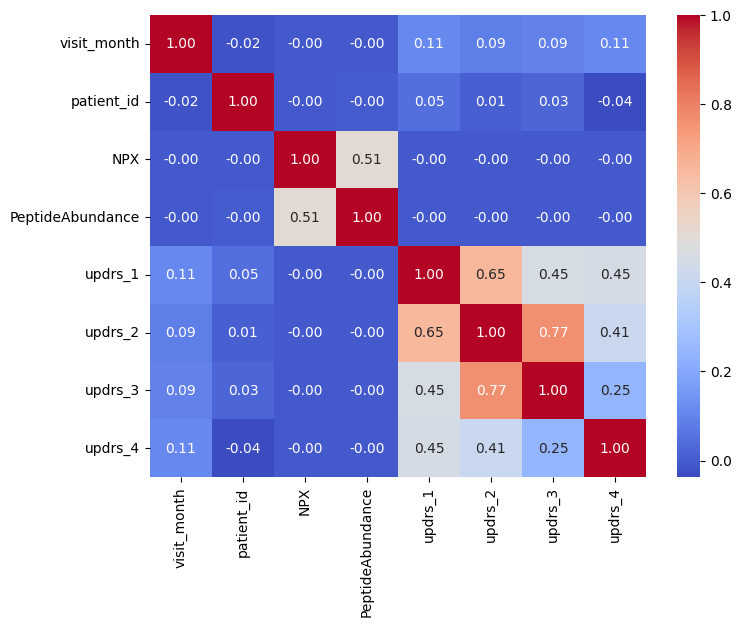

In [10]:
#Heatmap to get better understanding of the correlated data
numeric_cols = merged_data.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [11]:
#Pivot on UnitProtein
merged_data_pivotted = merged_data.pivot(index='visit_id', columns = ['Peptide'], values = 'PeptideAbundance')

In [12]:
merged_data_pivotted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [13]:
#Merging dataset to add updrs_1,2,3,4

new_merged = pd.merge(clinical_train, merged_data_pivotted, on="visit_id", how="left")
new_merged = new_merged.set_index('visit_id')

In [14]:
new_merged

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,55,0,10.0,6.0,15.0,NaN,NaN,8984260.0,53855.6,8579740.0,...,201158.0,16492.3,3810270.0,106894.0,580667.0,131155.0,165851.0,437305.0,46289.2,14898.4
55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55_6,55,6,8.0,10.0,34.0,NaN,NaN,8279770.0,45251.9,8655890.0,...,171079.0,13198.8,4119520.0,113385.0,514861.0,103512.0,144607.0,457891.0,40047.7,20703.9
55_9,55,9,8.0,9.0,30.0,0.0,On,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55_12,55,12,10.0,10.0,41.0,0.0,On,8382390.0,53000.9,8995640.0,...,231772.0,17873.8,5474140.0,116286.0,711815.0,136943.0,181763.0,452253.0,54725.1,21841.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65043_48,65043,48,7.0,6.0,13.0,0.0,Off,7187220.0,72262.2,8551210.0,...,233567.0,14478.3,3185530.0,48793.0,501159.0,133992.0,170146.0,359045.0,45780.0,17370.6
65043_54,65043,54,4.0,8.0,11.0,1.0,Off,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65043_60,65043,60,6.0,6.0,16.0,1.0,Off,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
targets = {}
for event in range(1, 5):
    for month in [0, 6, 12, 24]:
        clinical_train[f'updrs_{event}_plus_{month}_months'] = 0

for p_id in clinical_train.patient_id.unique():
    patient_data = clinical_train[clinical_train.patient_id == p_id]
    month_ranges = []
    month_intervals = [0, 6, 12, 24]
    for visit_month in patient_data.visit_month.values:
        month_ranges.append([visit_month, visit_month + 6, visit_month + 12, visit_month + 24])
    for idx, month_range in enumerate(month_ranges):
        for event in range(1, 5):
            updrs_values = patient_data[patient_data.visit_month.isin(month_range)][f'updrs_{event}'].fillna(0).to_list()
            if len(updrs_values) == 4:
                for e, value in enumerate(updrs_values):
                    m = month_range[0]
                    patient_data.loc[patient_data.visit_month == m, [f'updrs_{event}_plus_{month_intervals[e]}_months']] = value
            else:
                patient_data = patient_data[~patient_data.visit_month.isin(month_range)]
    targets[p_id] = patient_data


In [16]:
formatted_clin = pd.concat(targets.values(), ignore_index=True).set_index('visit_id').iloc[:, 7:]
formatted_clin.head()

,updrs_1_plus_0_months,updrs_1_plus_6_months,updrs_1_plus_12_months,updrs_1_plus_24_months,updrs_2_plus_0_months,updrs_2_plus_6_months,updrs_2_plus_12_months,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months
visit_id,,,,,,,,,,,,,,,,
55_0,10,8,10,16,6,10,10,9,15,34,41,49,0,0,0,0
55_6,8,10,7,14,10,10,13,13,34,41,38,49,0,0,0,0
55_12,10,7,16,17,10,13,9,18,41,38,49,51,0,0,0,0
55_18,7,16,14,12,13,9,13,20,38,49,49,41,0,0,0,0
55_24,16,14,17,17,9,13,18,16,49,49,51,52,0,0,0,0


In [17]:
protfeatures = proteins_train.pivot(index='visit_id', columns='UniProt', values='NPX')
protfeatures.head()

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.9,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.1,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55


In [18]:
df = protfeatures.merge(formatted_clin, left_index=True,right_index=True,how='right')
print(f'\nNA values: {df[protfeatures.columns].isna().sum().sum()/(len(df)*len(protfeatures.columns)):.2%}')
df['visit_month'] = df.reset_index().visit_id.str.split('_').apply(lambda x: int(x[1])).values
df.head()


NA values: 53.64%


,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,11254.3,732430.0,39585.8,41526.9,31238.0,4202.71,177775.0,62898.2,333376.0,166850.0,...,9,15,34,41,49,0,0,0,0,0
55_6,13163.6,630465.0,35220.8,41295.0,26219.9,4416.42,165638.0,62567.5,277833.0,170345.0,...,13,34,41,38,49,0,0,0,0,6
55_12,15257.6,815083.0,41650.9,39763.3,30703.6,4343.60,151073.0,66963.1,332401.0,151194.0,...,18,41,38,49,51,0,0,0,0,12
55_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,38,49,49,41,0,0,0,0,18
55_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16,49,49,51,52,0,0,0,0,24


In [19]:
def extract_month(visit_id):
    split_visit_id = visit_id.split('_')
    return int(split_visit_id[1])

unique_visit_months = df.reset_index().visit_id.apply(extract_month).unique().tolist()
protein_list = protfeatures.columns.tolist()


In [20]:
X = df[protfeatures.columns.to_list() + ["visit_month"]]
y = df[formatted_clin.columns]
print('\nX and y shapes:')
X.shape, y.shape


X and y shapes:


((954, 228), (954, 16))

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

X.loc[:, 'visit_month'] = X['visit_month'].astype(float)
y = y.astype(float)

# Define a ColumnTransformer to scale and impute numerical features
preprocessor = make_column_transformer(
    (make_pipeline(KNNImputer(), StandardScaler()), 
     make_column_selector(dtype_include='number'))
)

# Apply the preprocessor to X to obtain the transformed data
X_transformed = preprocessor.fit_transform(X)


/tmp/ipykernel_20/3756483888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'visit_month'] = X['visit_month'].astype(float)
/tmp/ipykernel_20/3756483888.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'visit_month'] = X['visit_month'].astype(float)


In [22]:
import tensorflow.keras.backend as K

def smape_loss_plus_one(y_true, y_pred):
    epsilon = 0.1
    numer = K.abs(y_pred + 1 - y_true - 1)
    denom = K.maximum(K.abs(y_true) + K.abs(y_pred) + 2*epsilon, 1.5 + 2*epsilon)
    smape_plus_one = numer / (denom/2)
    smape_plus_one = tf.where(tf.math.is_nan(smape_plus_one), tf.zeros_like(smape_plus_one), smape_plus_one)
    return smape_plus_one

def calculate_smape_plus_one(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numer = np.round(np.abs(y_pred + 1 - y_true - 1), 0)
    denom = np.round(np.abs(y_true) + np.abs(y_pred) + 2, 0)
    smape_plus_one = 1/len(y_true) * np.sum(np.nan_to_num(numer / (denom/2))) * 100
    return smape_plus_one


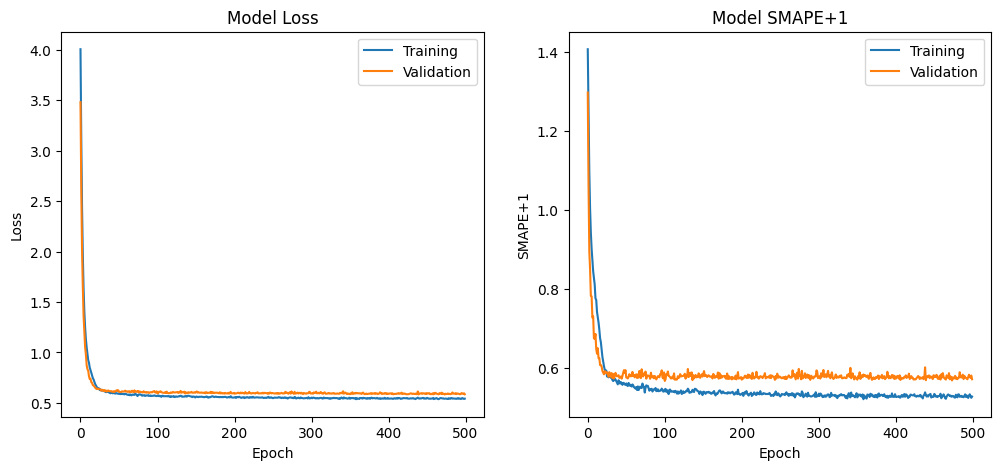

Final training loss: 0.5423844456672668
Final validation loss: 0.5860313177108765


In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(256, input_shape=[X.shape[1]], activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(y.shape[1], activation='linear'))

model.compile(optimizer='adam', loss=smape_loss_plus_one, metrics=[smape_loss_plus_one])

history = model.fit(X_transformed, y, epochs=500, batch_size=32, validation_split=.2, verbose=False)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(['Training', 'Validation'])

# Plot training and validation SMAPE+1
axs[1].plot(history.history['smape_loss_plus_one'])
axs[1].plot(history.history['val_smape_loss_plus_one'])
axs[1].set_title('Model SMAPE+1')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('SMAPE+1')
axs[1].legend(['Training', 'Validation'])

plt.show()

# Print the final training and validation loss
print('Final training loss:', history.history['loss'][-1])
print('Final validation loss:', history.history['val_loss'][-1])



In [24]:
##Submission

In [25]:
test_proteins = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv') 
test_peptides = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv') 
sample_submission = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv')
clinical = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv')

In [26]:
def prepare_features(clinical, proteins):
    """Format features"""
    X_submission = proteins.pivot(index='visit_id',columns='UniProt', values='NPX')
    
    
    missing_visits = np.setdiff1d(np.array(clinical.visit_id.unique()), np.array(X_submission.index)).tolist()
    missing_proteins = np.setdiff1d(np.array(protein_list), np.array(X_submission.columns)).tolist()
    for mv in missing_visits:
        X_submission.loc[mv] = np.NaN
    
    for mp in missing_proteins:
        X_submission.loc[:,mp] = np.NaN
        
    X_submission = X_submission[protein_list]    
    X_submission['visit_month'] = X_submission.reset_index().visit_id.str.split("_").apply(lambda x: int(x[1])).values    
    X_submission.visit_month = X_submission.visit_month.astype('float')
    
    return X_submission
def get_predictions(features, model):
    """Make predictions from prepared features"""
    X_submission_trans = preprocessor.transform(features)
    # Predict and format ratings
    pred_submission = np.around(np.abs(model.predict(X_submission_trans)),0)
    pred_submission = pd.DataFrame(pred_submission, index= features.index, columns = y.columns)
    
    return pred_submission
def format_predictions(predictions, sample_submission):
    """Format predictions for submission"""
    pred_submission = pd.DataFrame(predictions.stack())

    # Map predictions to sample_submission
    pred_submission.index = pred_submission.index.map('_'.join)
    pred_submission.columns = ['rating']
    sample_submission.rating = sample_submission.prediction_id.map(pred_submission.rating)
    
    return sample_submission.fillna(0)

In [27]:
# Prepare test features
test_features = prepare_features(clinical, test_proteins)

# Make predictions for test features
test_predictions = get_predictions(test_features, model)

# Format predictions for submission
test_submission = format_predictions(test_predictions, sample_submission)

# Print the first few rows of the submission
print(test_submission.head())



1/1 [==============================] - 0s 137ms/step
                   prediction_id  rating  group_key
0   3342_0_updrs_1_plus_0_months     4.0          0
1   3342_0_updrs_1_plus_6_months     4.0          0
2  3342_0_updrs_1_plus_12_months     4.0          0
3  3342_0_updrs_1_plus_24_months     4.0          0
4   3342_0_updrs_2_plus_0_months     1.0          0


In [28]:
test_features = prepare_features(clinical, test_proteins)
test_predictions = get_predictions(test_features,model)
test_submission = format_predictions(test_predictions, sample_submission)
test_submission

1/1 [==============================] - 0s 31ms/step


,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,4.0,0
1,3342_0_updrs_1_plus_6_months,4.0,0
2,3342_0_updrs_1_plus_12_months,4.0,0
3,3342_0_updrs_1_plus_24_months,4.0,0
4,3342_0_updrs_2_plus_0_months,1.0,0
...,...,...,...
59,50423_6_updrs_3_plus_24_months,18.0,6
60,50423_6_updrs_4_plus_0_months,0.0,6
61,50423_6_updrs_4_plus_6_months,0.0,6
62,50423_6_updrs_4_plus_12_months,0.0,6


In [29]:
#Submission

In [30]:
import sys
sys.path.append('/kaggle/input/amp-parkinsons-disease-progression-prediction')

import amp_pd_peptide_310


In [31]:
env = amp_pd_peptide_310.make_env()   # environment provided by competition
iter_test = env.iter_test()

In [32]:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    sub_features = prepare_features(test, test_proteins)
    sub_predictions = get_predictions(sub_features,model)
    submission = format_predictions(sub_predictions, sample_submission)

    env.predict(submission)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
1/1 [==============================] - 0s 26ms/step


In [33]:
pd.read_csv('/kaggle/working/submission.csv')

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,4.0
1,3342_0_updrs_1_plus_6_months,4.0
2,3342_0_updrs_1_plus_12_months,4.0
3,3342_0_updrs_1_plus_24_months,4.0
4,3342_0_updrs_2_plus_0_months,1.0
...,...,...
59,50423_6_updrs_3_plus_24_months,18.0
60,50423_6_updrs_4_plus_0_months,0.0
61,50423_6_updrs_4_plus_6_months,0.0
62,50423_6_updrs_4_plus_12_months,0.0


In [34]:
##This notebook has used some of the part from https://www.kaggle.com/code/umbertofasci/amp-pdpp-eda-tf-model/notebook#sMAPE-Function